# Hands-on Exercise for Module 1: Exploratory Data Analysis

### 0.Importing important packages

In [1]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            

### 1. Loading data, determining samples, attributes, and types of attributes

Use Davis dataset avaialble at the url https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv
    
Description of the data is provided at http://math.furman.edu/~dcs/courses/math47/R/library/car/html/Davis.html

Drop rows in the data set with missing values (NA), using dropna(inplace=True) function.

<span style="color:red">**Question 1a:** </span> Based on the data description, ware the data points and what are the attributes in this data? <br>

#### <span style="color:green">Answer:</span>  Each data point represents a man or women who is engaged in regular exercise. The attributes are sex, measured weight, measured height, reported height, and reported weight the the men and women.


<span style="color:red">**Question 1b:** </span> Who are selected as subjects in the study? <br>

<span style="color:green">Answer:</span> Mean and women that are engaged in regular exercise

<span style="color:red">**Question 1c:** </span> How many data points are in this dataset? <br>

In [2]:
davis_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv')

In [3]:
davis_df.dropna(inplace=True);

In [4]:
davis_df.shape

(181, 6)

 <span style="color:green">Answer:</span> There are 181 data points in this set.

<span style="color:red">**Question 1d:** </span> How many attributes are in this dataset? <br>

 <span style="color:green">Answer:</span> There are 6 attribute in this set.

<span style="color:red">**Question 1e:** </span> What type of attributes are present in the dataset? <br> 
       

In [5]:
davis_df.dtypes

Unnamed: 0      int64
sex            object
weight          int64
height          int64
repwt         float64
repht         float64
dtype: object

 <span style="color:green">Answer:</span> There are attributes of type int 64, object, and float 64. 
 

### 2. Generating summary statistics


Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

In [6]:
davis_df.drop(columns=davis_df.columns[davis_df.columns.str.contains('unnamed', case=False)], inplace=True)
davis_df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


<span style="color:red">**Question 2a:** </span> What are range of values the numeric attributes take? <br> 
[Hint: Use exclude=object option in describe() function to ignore the attribute sex]

In [7]:
davis_df.describe(exclude=object)

,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000
mean,66.303867,170.154696,65.679558,168.657459
std,15.340992,12.312069,13.834220,9.394668
min,39.000000,57.000000,41.000000,148.000000
25%,56.000000,164.000000,55.000000,161.000000
50%,63.000000,169.000000,63.000000,168.000000
75%,75.000000,178.000000,74.000000,175.000000
max,166.000000,197.000000,124.000000,200.000000


 <span style="color:green">Answer:</span> Measured weight ranges from 38 to 166 kilograms. Measured height ranges from 57 to 197 centimeters. Reported height ranges from 41 to 124 kilograms. Reported height ranges from 148 to 200 centimeters

<span style="color:red">**Question 2b:** </span> What different values do categorical attributes take? <br> 
[Hint: Use include=object option in describe() function to ignore the attribute sex]

In [48]:
davis_df.describe(include=object)

,sex
count,181
unique,2
top,F
freq,99


 <span style="color:green">Answer:</span> The different values for the categorical attribute is male and female. 

<span style="color:red">**Question 2c:** </span> What are the mean values for each of the numeric attributes? <br> 

In [9]:
from pandas.api.types import is_numeric_dtype

for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % davis_df[col].mean())
        

weight:
	 Mean = 66.30
height:
	 Mean = 170.15
repwt:
	 Mean = 65.68
repht:
	 Mean = 168.66


<span style="color:red">**Question 2d:** </span> What is the variance for each of the numeric attributes? <br> 

In [10]:
from pandas.api.types import is_numeric_dtype

for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % davis_df[col].var())

weight:
	 Mean = 235.35
height:
	 Mean = 151.59
repwt:
	 Mean = 191.39
repht:
	 Mean = 88.26


<span style="color:red">**Question 2e:** </span> Visually examine how the attribute 'weight' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


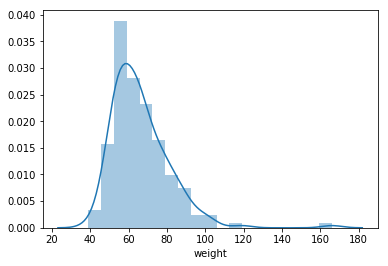

In [11]:
sns.distplot(davis_df['weight']);

 <span style="color:green">Answer:</span> This distribution is not normally distributed. It is skewed to the right. 

<span style="color:red">**Question 2f:** </span> Visually examine how the attribute 'height' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

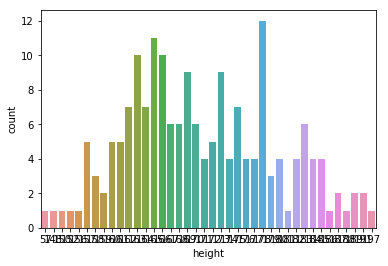

In [12]:
sns.countplot(davis_df['height']);

 <span style="color:green">Answer:</span> This distribution looks more similar to a gaussian distribution than a uniform distribution. 

<span style="color:red">**Question 2g:** </span> Visually examine how the attribute 'repwt' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

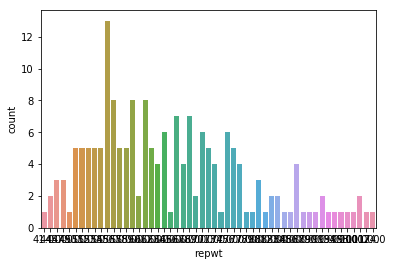

In [13]:
sns.countplot(davis_df['repwt']);

 <span style="color:green">Answer:</span> This distribution, again, appears to look more Gaussian with a skew to the right. 

<span style="color:red">**Question 2h:** </span> Visually examine how the attribute 'repht' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

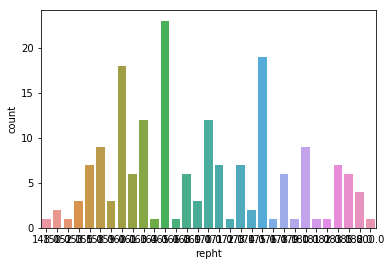

In [14]:
sns.countplot(davis_df['repht']);

 <span style="color:green">Answer:</span>  This distribution looks like a sparse Gaussian distribution. 

<span style="color:red">**Question 2i:** </span> Visually examine how the attribute 'sex' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution? 

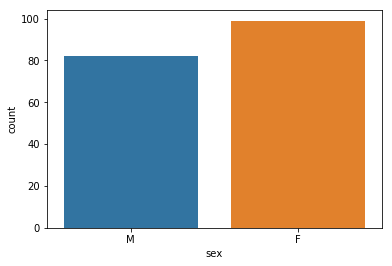

In [15]:
sns.countplot(davis_df['sex']);

 <span style="color:green">Answer:</span>  This distriubtion looks more like a uniform distribution than a Gaussian distribution.

<span style="color:red">**Question 2j:** </span> Is it possible for attribute 'sex' to follow a Gaussian distribution? Support your answer with a rationale. 

 <span style="color:green">Answer:</span>  It would not be possible for sex to follow a gaussian distribution. This is do to there only being two sexes measured. There can be no symmetry, except uniformity, that is characteristic of a Gaussian distribution. 

<span style="color:brown">**Note:** </span> For this part, we will restrict to 'repwt' and 'repht' attributes in the davis dataset as we can only visualize 2D space.

In [16]:
davis_df_new = davis_df[['repwt','repht']]

In [17]:
davis_df_new.head()

,repwt,repht
0,77.0,180.0
1,51.0,159.0
2,54.0,158.0
3,70.0,175.0
4,59.0,155.0


<span style="color:red">**Question 3a:** </span> Show the Geometric view of this data 'davis_df_new' on a 2D space along with the mean. 

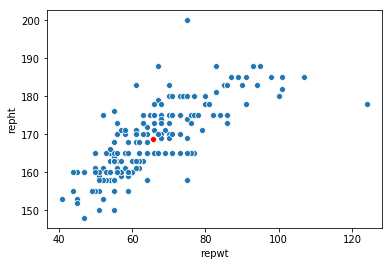

In [18]:
fig, ax = plt.subplots()
sns.scatterplot(x='repwt',y='repht',data=davis_df_new,ax=ax)
mu = np.mean(davis_df_new.values,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

<span style="color:red">**Question 3b:** </span> From the geometric view, state your observations about the data and any relationships you observe between the attributes. 

In [19]:
Based on my observation, there appears to be a positive correlation between repwt and repht. 

SyntaxError: invalid syntax (<ipython-input-19-d945d96dc131>, line 1)

We will further normalize the magnitude of each row in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_row_norm.

In [20]:
from sklearn.preprocessing import normalize
davis_df_new_row_norm = normalize(davis_df_new, axis=1, norm='l2')

In [21]:
davis_df_new_row_norm[1:10,:]

array([[0.30542755, 0.95221532],
       [0.32340548, 0.94626048],
       [0.37139068, 0.92847669],
       [0.35574458, 0.93458322],
       [0.41835989, 0.90828134],
       [0.42288547, 0.90618314],
       [0.37582461, 0.92669081],
       [0.37595091, 0.92663958],
       [0.35232976, 0.93587592]])

<span style="color:red">**Question 3c:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. 

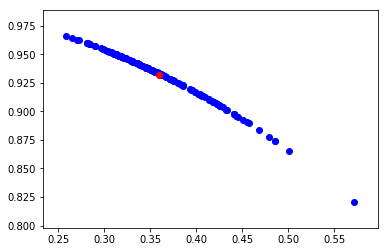

In [28]:
mu = np.mean(davis_df_new_row_norm,axis=0)
plt.figure()
plt.scatter(davis_df_new_row_norm[:, 0], davis_df_new_row_norm[:, 1], c='b')
plt.scatter(mu[0], mu[1], c='r')


AttributeError: 'numpy.ndarray' object has no attribute 'get'

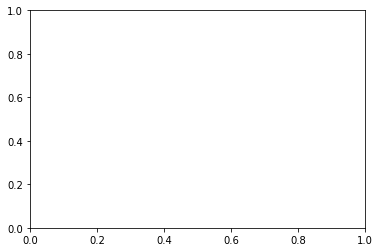

 <span style="color:green">Answer:</span> 

<span style="color:red">**Question 3d:** </span> Comment on the new geomateric view of the data in comparison to the view you observed in Question 3b. Provide a reason for the difference in the two geometric views.

 <span style="color:green">Answer:</span> In the row normalized data, our scatterplot indicated a negative correlation, and it follows a smooth curve. The reason for this difference is that our data has been row normalized. 

<span style="color:red">**Question 3e:** </span> Show the Probabilistic view of the data davis_df_new.

In [29]:
from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new.values,0)
Sigma = np.cov(davis_df_new.values.transpose())

min_length = np.min(davis_df_new.values[:,0]);
min_width = np.min(davis_df_new.values[:,1]);
max_length = np.max(davis_df_new.values[:,0]);
max_width = np.max(davis_df_new.values[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(positions)

Text(0.5,1,'Probabilistic view')

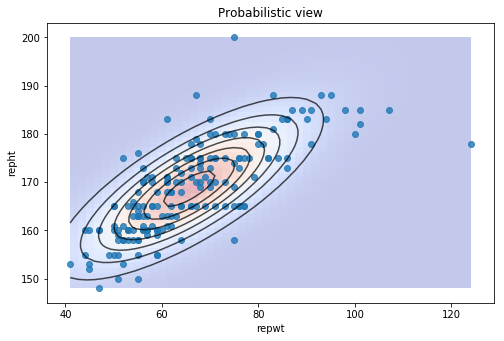

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='k', alpha=0.7)
plt.scatter(davis_df_new.values[:,0],davis_df_new.values[:,1],alpha=0.8)
ax.set_xlabel('repwt')
ax.set_ylabel('repht')
plt.title('Probabilistic view')

We will normalize the magnitude of each column in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_col_norm.

In [31]:
davis_df_new_col_norm = normalize(davis_df_new, axis=0, norm='l2')

In [32]:
davis_df_new_col_norm[1:10,:]

array([[0.05648398, 0.06996539],
       [0.05980657, 0.06952536],
       [0.07752703, 0.07700594],
       [0.06534421, 0.06820526],
       [0.08417221, 0.0726056 ],
       [0.08527974, 0.0726056 ],
       [0.08084962, 0.07920611],
       [0.07863456, 0.07700594],
       [0.07088186, 0.07480577]])

<span style="color:red">**Question 3f:** </span> Show the Probabilistic view of the data davis_df_new_col_norm. 

In [33]:
from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new_col_norm,0)
Sigma2 = np.cov(davis_df_new_col_norm.transpose())

min_length = np.min(davis_df_new_col_norm[:,0]);
min_width = np.min(davis_df_new_col_norm[:,1]);
max_length = np.max(davis_df_new_col_norm[:,0]);
max_width = np.max(davis_df_new_col_norm[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma2)
Z = F.pdf(positions)

Text(0.5,1,'Probabilistic view')

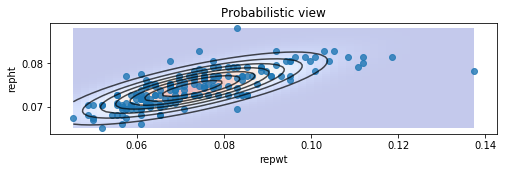

In [34]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='k', alpha=0.7)
plt.scatter(davis_df_new_col_norm[:,0],davis_df_new_col_norm[:,1],alpha=0.8)
ax.set_xlabel('repwt')
ax.set_ylabel('repht')
plt.title('Probabilistic view')

<span style="color:green">Answer:</span>  

<span style="color:red">**Question 3g:** </span> Compare the shape of the covariance structure in Question 3f with that of Question 3e and comment if column normalization has affected the shape of the covariance structure.

<span style="color:green">Answer:</span>  Normalization has affected the shape of the covariance structure slightly. The contour lines have been flattened and expanded more towards the right. 

### 4. Understanding the (in)dependencies among attributes using Covariance matrix

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

<span style="color:red">**Question 4a:** </span> Compute the covariance matrix.

In [ ]:
print('Covariance:')
davis_df.cov()

<span style="color:red">**Question 4b:** </span> Which pairs of attributes co-vary in the opposite direction?

<span style="color:green">Answer: </span> All of the values are positively correlated. 



<span style="color:red">**Question 4c:** </span> Compute the correlation matrix.

In [20]:
print('Correlation:')
davis_df.corr()

Correlation:


,weight,height,repwt,repht
weight,1.000000,0.154258,0.835376,0.631435
height,0.154258,1.000000,0.603737,0.739166
repwt,0.835376,0.603737,1.000000,0.761860
repht,0.631435,0.739166,0.761860,1.000000


<span style="color:red">**Question 4d:** </span> Which pairs of attributes are highly correlated? Clearly specify the highly positive and highly negatively correlated attributes.

<span style="color:green">Answer: </span> Highly positive correlated pairs:
Measure Weight, Reported Weight
Measured weight, Reported Height
Measured Height, Reported Weight
Measured Height, Reported Height
Reported Weight, Reported Height


<span style="color:red">**Question 4e:** </span> Which pairs of attributes are uncorrelated?

<span style="color:green">Answer:</span> 
The only week correlation in this data set is between measured height, and measured weight. 

<span style="color:red">**Question 4f:** </span> What information did you gather from a correlation matrix that is not available in a covariance matrix?

<span style="color:green">Answer:</span> The extra information you get from the correlation matrix is the relation between two variables that is not affected by the scale of either. It is like measuring the angle between two variables. 

### 5. Dimensionality Reduction: Feature Selection

**Data:** Iris dataset from the practice notebook. (https://raw.githubusercontent.com/plotly/datasets/master/iris.csv)

**Assumption:** Assume that your goal is to cluster the data to identify the species 'Name'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Name' attribute will be hidden from the clustering algorithm.

In [21]:
import seaborn as sns
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


<span style="color:red">**Question 5a:** </span> If you are allowed to select only one attribute, which attribute would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

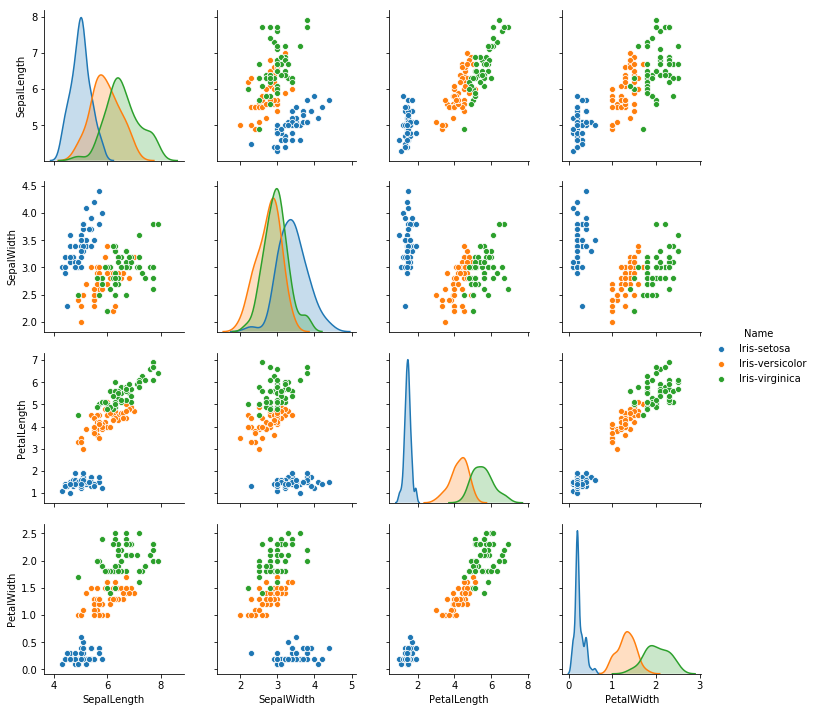

In [22]:
sns.pairplot(iris_df, hue="Name")

<span style="color:green">Answer:</span> If I had to choose one attribute for the clustering task, I would use PetalWidth. I would use this attribute because it appears the area of overlap between the distributions of the flower types is minimal. Due to the minimal overlap and high variance between classes, the clusters will be more distinguished. 

<span style="color:red">**Question 5b:** </span> If you are allowed to select only two features, which feature would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

<span style="color:green">Answer:</span> If I had to choose two attributes, I would choose PetalLength and PetalWidth. For the same reason  as before, I would choose these two attributes. They have minimal overlap and high variance between classes which will create more distinguishable clusters. 

<span style="color:red">**Question 5c:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **feature selection** in that case? 

<span style="color:green">Answer:</span> Without that types of plant information, I would perform feature selection using principal component analysis to capture the attributes that account for the most variance within the set of data. 

### 6. Dimensionality Reduction: PCA on Iris Data

<span style="color:red">**Question 6a:** </span> Perform PCA on Iris dataset and project the data onto the first two principal components. Use the attributes 'SepalLength','SepalWidth','PetalLength', and 'PetalWidth'. 

Hint: Use iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']] to use the specified attributes.

In [23]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
pca = PCA(2)
projected = pd.DataFrame(pca.fit_transform(iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']]))
print(iris_df.shape)
print(projected.shape) 

(150, 5)
(150, 2)


<span style="color:red">**Question 6b:** </span> Generate a pairplot (along with colors for the different types of iris plants) between the two newly generated features using PCA in the above step.

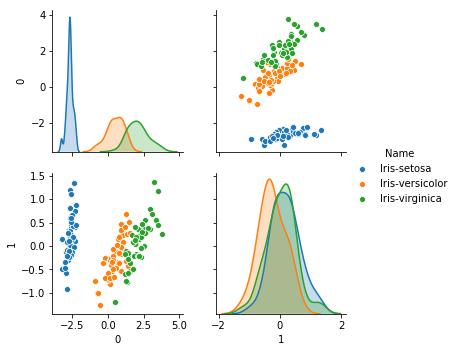

In [24]:
projected['Name'] = iris_df['Name']
sns.pairplot(projected, hue='Name')


<span style="color:red">**Question 6c:** </span> From the above pairplot, if only one newly generated attribute were to be used for clustering the data which newly generated attribute is best suited. Provide a reason. Is the newly generated attribute better than the feature selected in Question 5a?

<span style="color:green">Answer:</span> The best attribute would be the attribute represented in the top right corner. This is because There is minimal overlap between the classes of flowers which makes the clusters more distinguishable. This attribute seems like it would perform at about the same level as the attribute from 5a, because the distributions of the classes look alike and overlap similarly. 

<span style="color:red">**Question 6d:** </span> From the above pairplot, if two newly generated attributes were to be used for clustering the data, are the two newly generated attributes better than the features selected in Question 5b?

<span style="color:green">Answer:</span>  The two newly generated attributes together do not seem like they would be as effected as the attributes selected in 5b. There is a lot of overlap between the class distributions of the second feature which does not make it very effective for classifying flower type. 

<span style="color:red">**Question 6e:** </span> In general, are principal components guaranteed to be more informative than the original features for the data mining task at hand?

<span style="color:green">Answer:</span> Principal components are not guaranteed to be more informative for this task, because PCA does not optimize for this task. 

<span style="color:red">**Question 6f:** </span>In real-world problems ground-truth (types of iris plants) will not be available to determine if the principal compoents or original features are better suited for the data mining task at hand. How should one proceed with the data mining task?

<span style="color:green">Answer:</span> The best way to proceed would be to use linear discriminant analysis. 

### 7. Dimensionality Reduction: PCA on synthetic datasets

Consider the following synthetic dataset we refer to as **Blobs**. This dataset has 500 data points centered around (-5, -5), (0,0) and (5,5). This dataset has 1500 data points and 2 attributes.

In [25]:
n_samples = 1500
random_state = 42
centers = [(-5, -5), (0, 0), (5, 5)]
Blobs_X, Blobs_y = datasets.make_blobs(n_samples=n_samples,centers=centers,random_state=random_state)
Blobs_y = Blobs_y.astype(str)


In [26]:
Blobs_X.shape

(1500, 2)

Text(0.5,1,'Blobs')

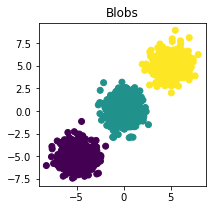

In [27]:
plt.figure(figsize=(3,3))
plt.scatter(Blobs_X[:, 0], Blobs_X[:, 1], c= Blobs_y)
plt.title('Blobs')


We generated a new dataset **Blobs1** by adding an extra attribute to this 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 1.

In [28]:
Blobs1= pd.DataFrame(Blobs_X)
Blobs1['2'] = np.random.randn(1500)
Blobs1.head()

,0,1,2
0,0.168461,1.317598,-0.165846
1,-3.534351,-5.225776,1.138630
2,-6.525525,-5.691908,-0.654892
3,-0.120948,0.419532,0.882061
4,-5.469474,-4.457440,0.397435


We generated a new dataset **Blobs2** by adding an extra attribute to the 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 100. Read more about how to do this at https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html.

In [29]:
Blobs2= pd.DataFrame(Blobs_X)
Blobs2['2'] = np.random.randn(1500)*10
Blobs2.head()

,0,1,2
0,0.168461,1.317598,-4.802351
1,-3.534351,-5.225776,-2.721057
2,-6.525525,-5.691908,-5.124457
3,-0.120948,0.419532,2.772398
4,-5.469474,-4.457440,-5.452522


We generated a new dataset **Blobs3** by adding two extra attributes to the 2D Blobs dataset. The values for the two new attributes are drawn from a normal distribution with mean 0 and variance 100. 

In [30]:
Blobs3= pd.DataFrame(Blobs_X)
Blobs3['2'] = np.random.randn(1500)*10
Blobs3['3'] = np.random.randn(1500)*10
Blobs3.head()

,0,1,2,3
0,0.168461,1.317598,-17.373495,-1.692865
1,-3.534351,-5.225776,-2.359591,5.461589
2,-6.525525,-5.691908,5.258740,-1.908480
3,-0.120948,0.419532,-6.959769,2.095838
4,-5.469474,-4.457440,-7.279706,-6.790430


<span style="color:red">**Question 7a:** </span> Plot pairplot for **Blobs1** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


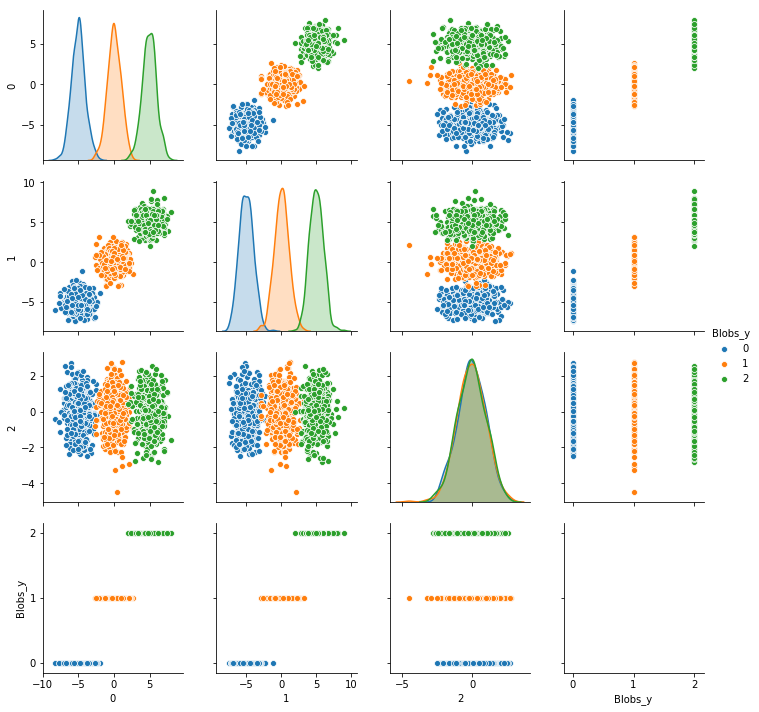

In [31]:
Blobs1['Blobs_y'] = Blobs_y
sns.pairplot(Blobs1, hue='Blobs_y')

<span style="color:green">Answer:</span> There appears to be less variance on the chart when the third attribute is present. There is also more overlap between classes. 

<span style="color:red">**Question 7b:** </span> Perform PCA on **Blobs1** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [32]:
pca = PCA(2)
projected = pd.DataFrame(pca.fit_transform(Blobs1.iloc[:, 0:3]))
projected['Blobs_y'] = Blobs_y
print(projected.shape)

(1500, 3)


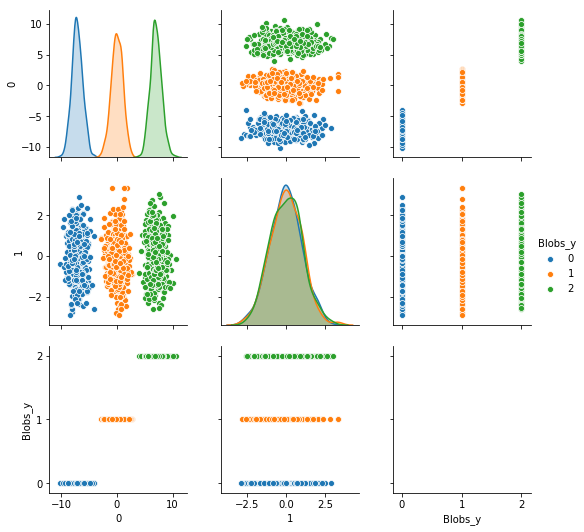

In [33]:
sns.pairplot(projected, hue='Blobs_y')

<span style="color:red">**Question 7c:** </span> By comparing the distributions for the newly generated attributes in Question 7b with the previous pairplot in Question 7a, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Provide a reason for your observations.

<span style="color:green">Answer:</span> The first principal component appears to capture the essence of the first two attributes from the previous pairplot. There are three distinguished normal curves just like in the previous pairplot for the first two attributes. I looks like there is even less overlap between the classes which makes me think it is a combination of the two. The second principal component looks like it captures the third attribute from the previous pairplot, because they both have three completely overlapping normal curves that look similar between the pairplots. 

<span style="color:red">**Question 7d:** </span> Plot pairplot for **Blobs2** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

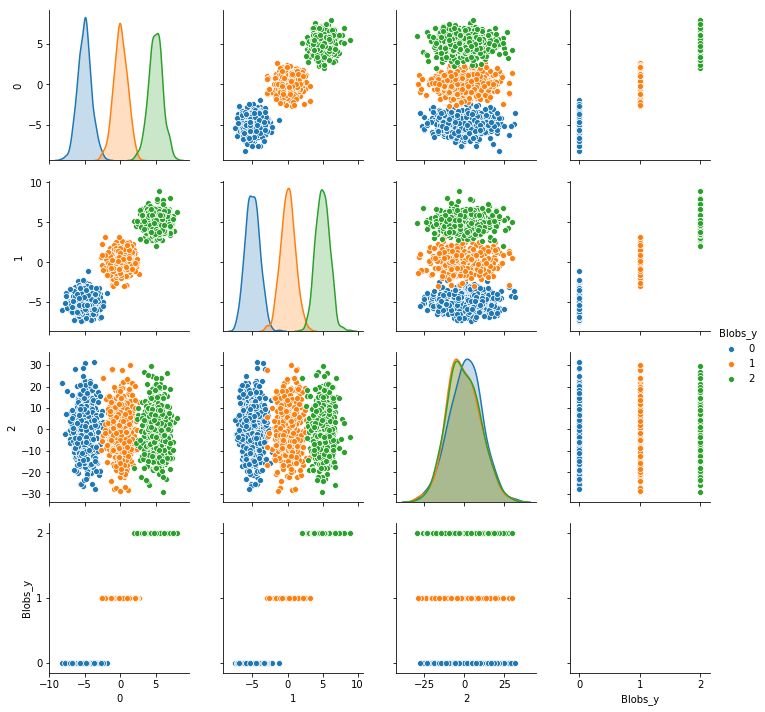

In [34]:
Blobs2['Blobs_y'] = Blobs_y
sns.pairplot(Blobs2, hue='Blobs_y')

<span style="color:green">Answer:</span> There appears to be greater variance on the chart when the third attribute is present. There is also more overlap between classes. 

<span style="color:red">**Question 7e:** </span> Perform PCA on **Blobs2** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [35]:
pca = PCA(2)
projected = pd.DataFrame(pca.fit_transform(Blobs2.iloc[:, 0:3]))
projected['Blobs_y'] = Blobs_y
print(projected.shape)

(1500, 3)


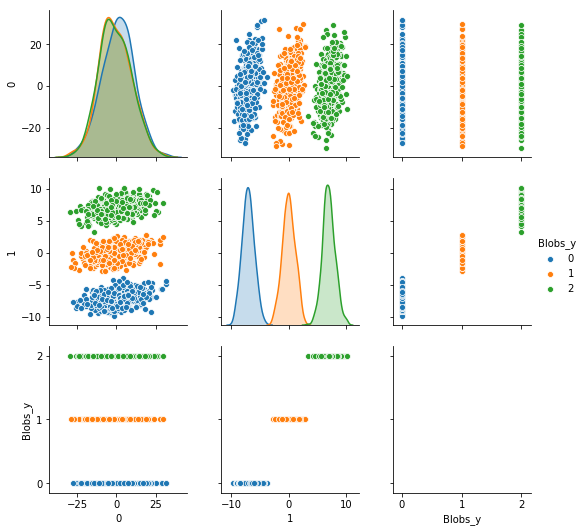

In [36]:
sns.pairplot(projected, hue='Blobs_y')

<span style="color:red">**Question 7f:** </span> By comparing the distributions for the newly generated attributes in Question 7e with the previous pairplot in Question 7d, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7c)?

<span style="color:green">Answer:</span> The first principal compenent is capturing the third attribute from the previous pairplot. The second principal component is capturing the first and second attributes from the previous pairplot. The first principal component captures the direction in which there is the most variance. The reason this differs from 7c is because in 7c the third attribute was responsible for less variance than the other two attributes. In contrast, the third attribute from Blobs2 is responsible for more variance. 

<span style="color:red">**Question 7g:** </span> Are the three blobs separately visible after projection based on PCA in Question 7e?

<span style="color:green">Answer:</span> Yes. The three blobs are separately visible. 

<span style="color:red">**Question 7h:** </span> Plot pairplot for **Blobs3** data. By visually examining this plot, comment on the strength of the correlation between the first two attributes. Also, comment on the strength of the correlation between the second two attributes.

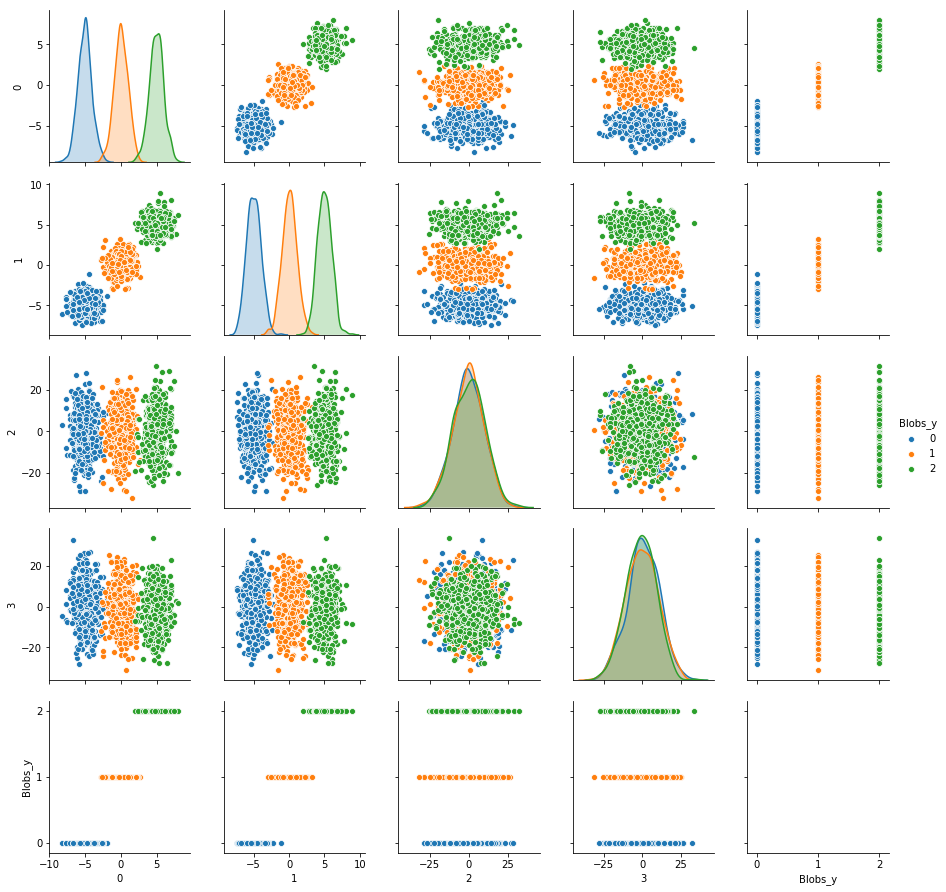

In [37]:
Blobs3['Blobs_y'] = Blobs_y
sns.pairplot(Blobs3, hue='Blobs_y')

<span style="color:green">Answer:</span> Between the first two attributes, there is a strong positive correlation as indicated by the positive trend from left to right and bottom to top. Between the second two attributes, there is little correlation. There does not appear to be any clear positive or negative trend on either axis. 

<span style="color:red">**Question 7i:** </span> Perform PCA on **Blobs3** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [38]:
pca = PCA(2)
projected = pd.DataFrame(pca.fit_transform(Blobs3.iloc[:, 0:4]))
projected['Blobs_y'] = Blobs_y
print(projected.shape)

(1500, 3)


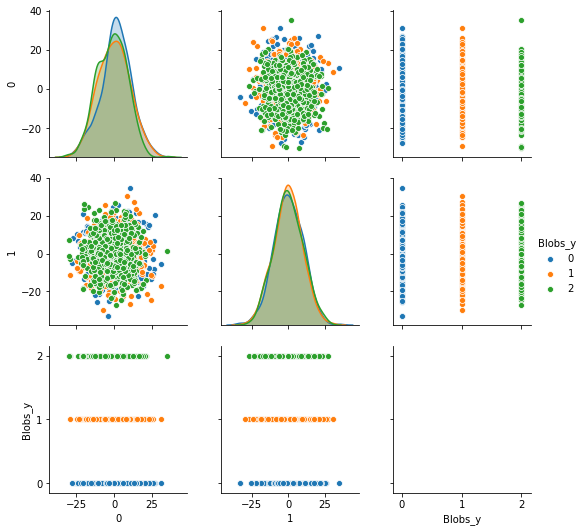

In [39]:
sns.pairplot(projected, hue='Blobs_y')

<span style="color:red">**Question 7j:** </span>  By comparing the distributions for the newly generated attributes in Question 7i with the previous pairplot in Question 7h, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7f and 7c)?

<span style="color:green">Answer:</span> The two principle components are captured by some combination of the third and fourth attributes. Both the third and fourth attributes contribute the greatest variance in Blobs 3 as indicated by their large spread on the charts. In contrast with this pairplot, in 7f and 7c, the first two attributes were able to capture a significant portion of the variance. Here the third and fourth attributes dominate with their large varianc with a spread radius close to 40 on each. 

<span style="color:red">**Question 7k:** </span>  Are the three blobs separately visible after projection based on PCA in Question 7i? What would have caused this, in comparison to your observation in Question 7g?

<span style="color:green">Answer:</span> The three blobs are not separately visible after PCA. This is because the dimensions which captured the most variance were chosen, not the dimensions which best distinguished the classes. The distributions for the classes with the third and fourth attributes were almost completely overlapping which makes it impossible to separate these classes cleanly using only these attributes. 

<span style="color:red">**Question 7l:** </span>  What limitation of PCA do your observations in Questions 7j, 7f, and 7c highlight?

<span style="color:green">Answer:</span> PCA can capture the directions of most variance, however, the algorithm is not optimized to distinguish between classes. The dimensions with most variance may not be the dimensions which distinguish class most clearly. 

### 8. Singular Value Decomposition

<span style="color:green"> **(Optional)** </span> <span style="color:red">Question 8a: </span> Using the code provided in the practice notebook for computing PCA, write your own SVD function (U,S,V = mysvd(A)) to factorize the matrix A into U,S, and V.

In [40]:
def mysvd(A):
    lambda1, U = np.linalg.eig(np.matmul(A.T, A))
    lambda2, V = np.linalg.eig(np.matmul(A, A.T))
    eigval_U = np.linalg.eigvals(U)
    S = np.sqrt(eigval_U)
    
    return U, S, V.T

<span style="color:green"> **(Optional)** </span>  <span style="color:red">Question 8b: </span> Demonstrate that your code is correct by using your function on the following matrix $A$ and showing that the product $USV^T=A$.

In [41]:
A = np.array([
    [1, 1, 1, 0, 0, 0],
    [3, 3, 3, 0, 0, 0],
    [4, 4, 4, 0, 0, 0],
    [5, 5, 5, 0, 0, 0],
    [0, 1, 0, 4, 4, 1],
    [0, 0, 0, 5, 5, 2],
    [0, 0, 0, 2, 2, 2]])

In [42]:
U, S, VT = svd(A)
S

array([1.23907772e+01, 9.86730009e+00, 1.35561282e+00, 5.17051476e-01,
       2.41592441e-16, 6.70536613e-18])

<span style="color:red">**Question 8c:**</span> Perform SVD on iris dataset and visualize the proportion of variance captured by each spectral value. List the dimensions that captures less than 10% of the total variance.

In [43]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


In [44]:
data = iris_df.values[:,0:4]
data = data.astype(float) #converts data format from object to numeric

In [62]:
U, S, V = svd(data, full_matrices = False)
U[0]


array([-6.16171172e-02,  1.29969428e-01, -5.58364155e-05,  1.05847972e-03])

Text(0,0.5,'Cumulative variance covered')

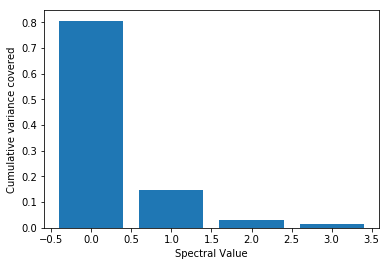

In [50]:
plt.bar(np.arange(4),S/np.sum(S))
plt.xlabel('Spectral Value')
plt.ylabel('Cumulative variance covered')


<span style="color:green">Answer:</span> The Third and Fourth Spectral Values contain less than 10% of the total variance. 

<span style="color:red">**Question 8d:**</span> The heatmap of the full data is shown below. Plot all the four spectral decomposition matrices based on SVD.

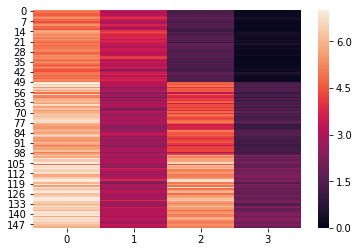

In [51]:
sns.heatmap(data,vmin=0, vmax=7)

array([-6.16171172e-02,  1.29969428e-01, -5.58364155e-05,  1.05847972e-03])

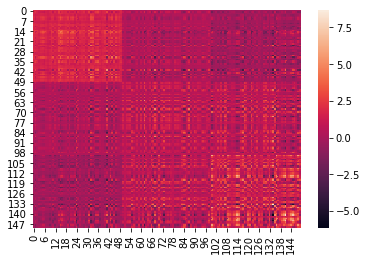

In [66]:
sns.heatmap(S[0]*np.matmul(U, U.T))


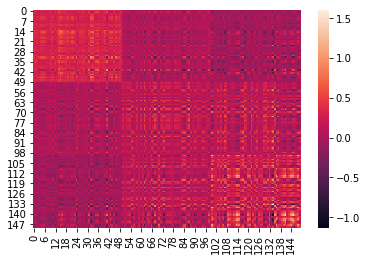

In [57]:
sns.heatmap(S[1]*np.matmul(U, U.T))

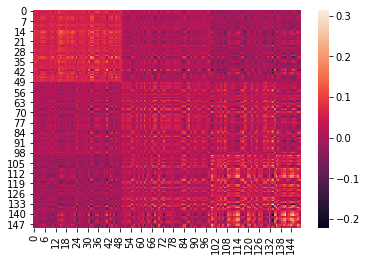

In [58]:
sns.heatmap(S[2]*np.matmul(U, U.T))

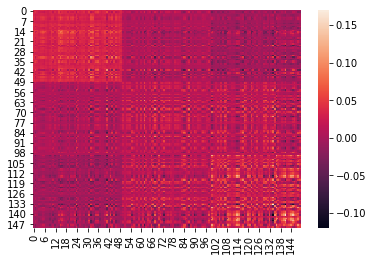

In [59]:
sns.heatmap(S[3]*np.matmul(U, U.T))

<span style="color:red">**Question 8e:**</span> Visually examine the magnitude of values present in each of the four spectral decomposition matrices and comment on which two of the four matrices have elements with relatively small magnitude in them. Provide a reason for this based on your obsevation in Question 8c. 

<span style="color:green">Answer:</span> 

### 9. Linear Discriminant Analysis

We will use digits data for studying the use of LDA.

In [35]:
digits = load_digits()

The data with 1797 samples and 64 attributes is in the object digits.data. These 64 attributes represent pixels in an 8x8 image.

In [36]:
digits.data.shape

(1797, 64)

The 1797 images are digits from 0...9. This information is in the digits.target variable.

In [37]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

For this part, we will only focus on digits 3 and 8. To this end, we generate indices of 183 samples with 3s and indices of 174 samples with 8s.

In [38]:
Threes = np.where(digits.target==3)
Eights = np.where(digits.target==8)
[np.size(Threes), np.size(Eights)]

[183, 174]

We will take samples from these indices and construct a matrix X such that the first 183 samples represent 3s and the remaining ones represent 8s. The variable y captures this information.

In [39]:
indices = np.hstack((Threes[0], Eights[0]));
X = digits.data[indices,:]
y = np.hstack((3*np.ones(np.size(Threes)), 8*np.ones(np.size(Eights))))

In [40]:
X

array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       [ 0.,  1.,  8., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [41]:
X.shape

(357, 64)

In [42]:
y

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8.

In [43]:
y.shape

(357,)

<span style="color:red">**Question 9a:**</span> Visually examine the following heatmap of the data X and comment which among attributes 43 and 45 can separate the 3s from 8s better.

[Text(159,0.5,'Samples'), Text(0.5,69,'Attributes')]

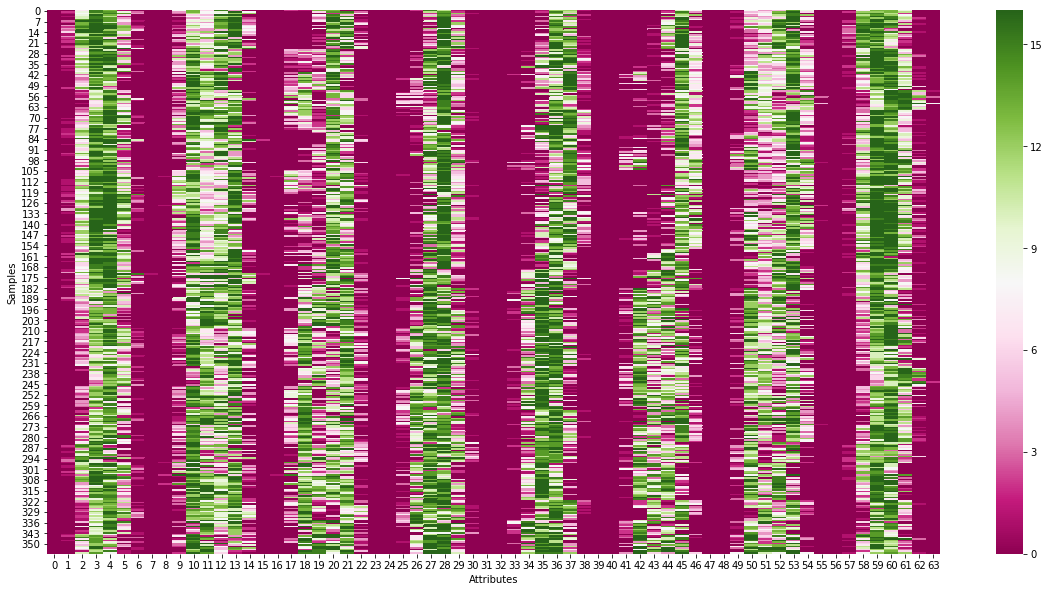

In [44]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')


<span style="color:green">Answer:</span> Attribute 43 seem the best amond these to separate the 3's from the 8's. this is because the attribute distinguishes the 3's and 8's most significantly due the the contrast between the top and bottom. 

<span style="color:red">**Question 9b:**</span> Perform LDA on this data. Plot the heatmap of the projected data and comment if the resultant projection is better than the best attribute between 43 and 45.

In [45]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r1 = lda.fit(X[:,43:45], y).transform(X[:,43:45])

[Text(159,0.5,'Samples'), Text(0.5,69,'Attributes')]

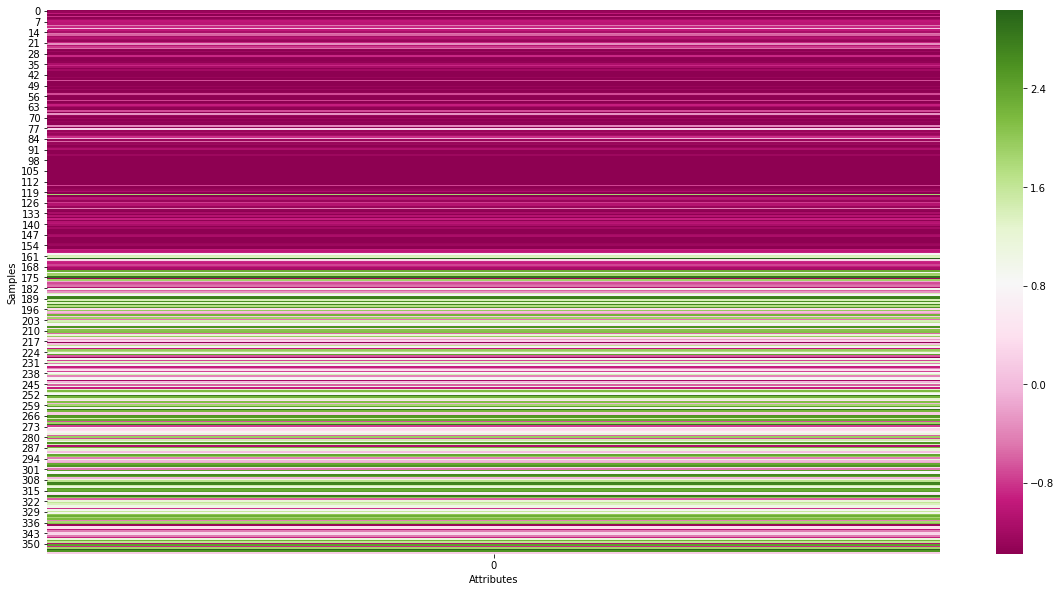

In [46]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X_r1,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

<span style="color:green">Answer:</span> This heatmap for our LDA looks like it separates that 3's and 8's about as well as attribute 43. 